In [2]:
import numpy as np
import argparse
import time
import cv2
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt
from IPython.display import Image
from gtts import gTTS

In [3]:
video=cv2.VideoCapture(0)
check,frame=video.read()

print(check)
print(frame)

cv2.imshow("capt",frame)
img1=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
path="C:\\Users\\K\\Desktop\\"
cv2.imwrite(os.path.join(path , 'try.jpg'), img1)
#cv2.waitKey(0)
video.release()
cv2.destroyAllWindows()

True
[[[159 165 169]
  [158 164 168]
  [158 164 168]
  ...
  [ 75 136 180]
  [ 73 136 180]
  [ 72 135 179]]

 [[164 163 168]
  [164 163 168]
  [157 162 168]
  ...
  [ 77 134 174]
  [ 73 134 176]
  [ 73 134 176]]

 [[162 161 165]
  [161 160 164]
  [156 159 168]
  ...
  [ 77 130 168]
  [ 75 135 173]
  [ 76 136 174]]

 ...

 [[174 157 131]
  [174 157 131]
  [174 158 127]
  ...
  [ 85  75  47]
  [ 84  60  44]
  [ 75  52  36]]

 [[173 154 129]
  [175 155 130]
  [167 158 127]
  ...
  [105  89  59]
  [ 99  77  52]
  [ 89  68  43]]

 [[170 154 126]
  [171 155 127]
  [174 157 129]
  ...
  [108  91  58]
  [104  85  55]
  [ 97  78  48]]]


In [4]:
labelsPath = "C:\\Users\\K\\Desktop\\coco.names"
LABELS = open(labelsPath).read().strip().split("\n")
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3),
	dtype="uint8")
weightsPath = "C:\\Users\K\\Desktop\\yolov3.weights"
configPath = "C:\\Users\\K\\Desktop\\yolov3.cfg"
net = cv2.dnn.readNetFromDarknet(configPath, weightsPath)

In [5]:
  pathh ="C:\\Users\\K\\Desktop\\try.jpg"
  image =cv2.imread(pathh)
  (H, W) = image.shape[:2]
  ln = net.getLayerNames()
  ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]
  blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416),
  swapRB=True, crop=False)
  net.setInput(blob)
  start = time.time()
  layerOutputs = net.forward(ln)
  end = time.time()
  print("[INFO] YOLO took {:.6f} seconds".format(end - start))
  boxes = []
  confidences = []
  classIDs = []
  idd=[]
  centers = []
  texts=[]
  for output in layerOutputs:
    for detection in output:
      scores = detection[5:]
      classID = np.argmax(scores)
      confidence = scores[classID]
      if confidence > 0.5:
        box = detection[0:4] * np.array([W, H, W, H])
        (centerX, centerY, width, height) = box.astype("int")
        x = int(centerX - (width / 2))
        y = int(centerY - (height / 2))
        boxes.append([x, y, int(width), int(height)])
        confidences.append(float(confidence))
        classIDs.append(classID)
        idd.append(classID)
        centers.append((centerX, centerY))
  idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.5,
	0.3)
if len(idxs) > 0:
    for i in idxs.flatten():
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])
        color = [int(c) for c in COLORS[classIDs[i]]]
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])
        cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
          0.5, color, 2)
        centerX, centerY = centers[i][0], centers[i][1]
        if centerX <= W/3:
            W_pos = "left "
        elif centerX <= (W/3 * 2):
            W_pos = "center "
        else:
            W_pos = "right "
        if centerY <= H/3:
            H_pos = "top "
        elif centerY <= (H/3 * 2):
            H_pos = "mid "
        else:
            H_pos = "bottom "

        texts.append("There is one "+ LABELS[classIDs[i]]+" in "+H_pos + W_pos )
print(texts)

[INFO] YOLO took 2.262994 seconds
['There is one person in mid left ', 'There is one person in bottom right ', 'There is one bottle in mid center ']


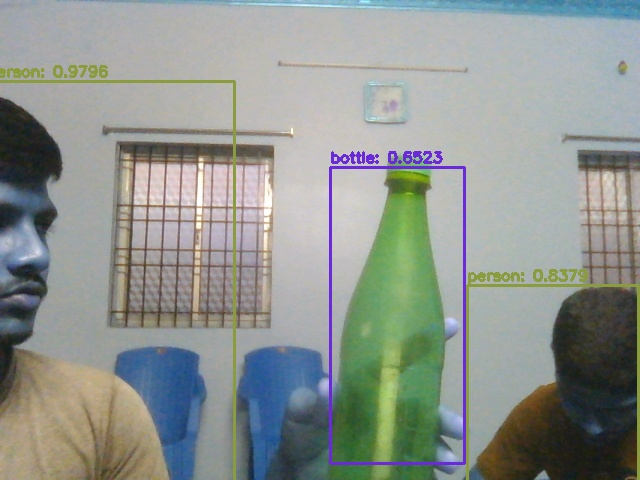

In [6]:
#Image('image.jpg')
cv2.imwrite('C:\\Users\\K\\Desktop\\output.jpg', image)
display(Image('C:\\Users\\K\\Desktop\\output.jpg'))

In [8]:
language = 'en'
#from tempfile import TemporaryFile
#print(texts)
mytext=''
if(len(texts)!=0):
    for ii in range(0,len(texts)):       
        mytext= mytext+" and "+texts[ii]
    print(mytext)
    myobj = gTTS(text=mytext, lang=language, slow=False)
    pat="C:\\Users\\K\\Desktop\speech\\obj2"+str(ii)+".mp3"
    myobj.save(pat)
    os.system(pat)
else:
    mytext="No object detected"
    myobj = gTTS(text=mytext, lang=language, slow=False)
    pat="C:\\Users\\K\\Desktop\speech\\objn.mp3"
    myobj.save(pat)
    os.system(pat)

 and There is one person in mid left  and There is one person in bottom right  and There is one bottle in mid center 
